In [1]:
from astropy.io import fits
import numpy as np
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
mask = mask_filename = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\mask_core11.npy"  # Use the same file path as above
mask = np.load(mask_filename)
# print(mask)

In [2]:
from skimage.measure import find_contours
from astropy.wcs import WCS
import numpy as np

fits_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cont.SPW0123.clean.image.pbcor.fits"
hdul = fits.open(fits_file)
header = hdul[0].header
data_cube = hdul[0].data 
# Ensure WCS is for 2D data

# Ensure WCS is for 2D data
wcs = WCS(header, naxis=2)

# Extract contours from the 2D mask
contours = find_contours(mask, level=0.5)  # Level 0.5 extracts the boundary

# Use the largest contour (if multiple are found)
if len(contours) > 0:
    # Choose the longest contour
    contour = max(contours, key=len)
else:
    raise ValueError("No contours found in the mask!")

# Extract X and Y pixel coordinates of the contour
x_pixels, y_pixels = contour[:, 1], contour[:, 0]

# Ensure the contour is closed by appending the first point at the end
x_pixels = np.append(x_pixels, x_pixels[0])
y_pixels = np.append(y_pixels, y_pixels[0])

# Convert pixel coordinates to RA and Dec
ra_dec_coords = wcs.pixel_to_world(x_pixels, y_pixels)

# Extract RA and Dec in degrees
ra = ra_dec_coords.ra.deg
dec = ra_dec_coords.dec.deg

# Combine into a list of tuples for polygon vertices
polygon_vertices = list(zip(ra, dec))

# Save to a DS9 region file
region_file = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\Core_11_MASK.reg"
with open(region_file, 'w') as f:
    f.write("# Region file format: DS9 version 4.1\n")
    f.write("global color=green dashlist=8 3 width=1 font='helvetica 10 normal' select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\n")
    f.write("fk5\n")  # Coordinate system
    f.write("polygon(")
    f.write(", ".join(f"{ra},{dec}" for ra, dec in polygon_vertices))
    f.write(")\n")

print(f"Region file saved as {region_file}")


Region file saved as C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\Core_11_MASK.reg


In [1]:
pip install regions

   ---------------------------------------- 0.0/344.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/344.5 kB ? eta -:--:--
   -- ------------------------------------ 20.5/344.5 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/344.5 kB 653.6 kB/s eta 0:00:01
   --------------- ------------------------ 133.1/344.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  337.9/344.5 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  337.9/344.5 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 344.5/344.5 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\astrodendro-0.2.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


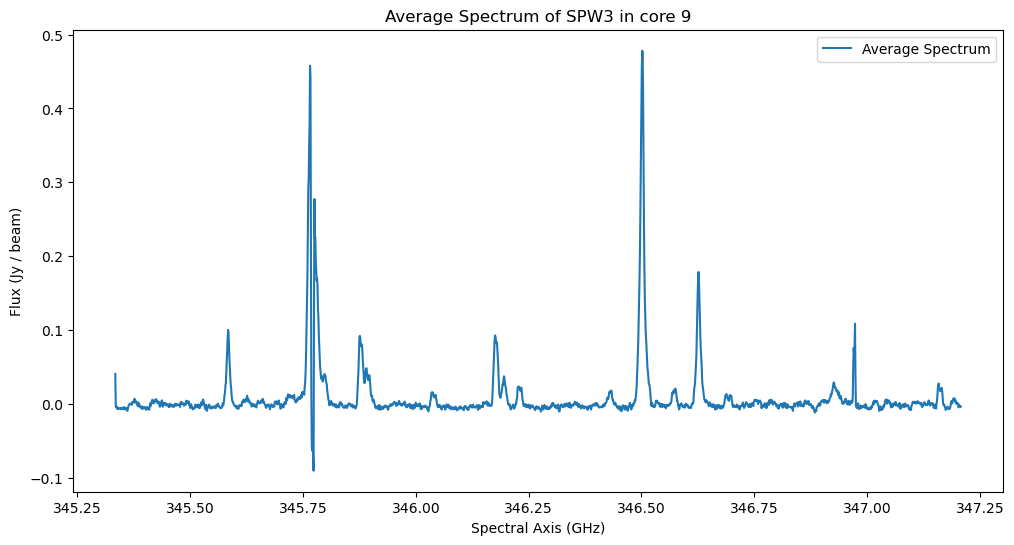

In [1]:
# In the following code I will fit the masked region into SPW 3 for both, core 9 and 11 (switch 9 and 11 in filenames to choose which one to change and write as FITS file)
from astropy.io import fits
import numpy as np
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
# %matplotlib qt
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp
import regions

fits_file_1 = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW3.clean.image.pbcor.fits"
cube = SpectralCube.read(fits_file_1)
cube.allow_huge_operations=True
region_list = regions.Regions.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\Core_9_MASK.reg")  
sub_cube = cube.subcube_from_regions(region_list)  
# sub_cube= sub_cube.to(u.K)
sub_cube.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW3\SPW3_CORE_9_mask.fits", overwrite = True)
spec_axis = sub_cube.spectral_axis.to(u.GHz)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure(figsize=(12, 6))
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW3 in core 9')
plt.legend()

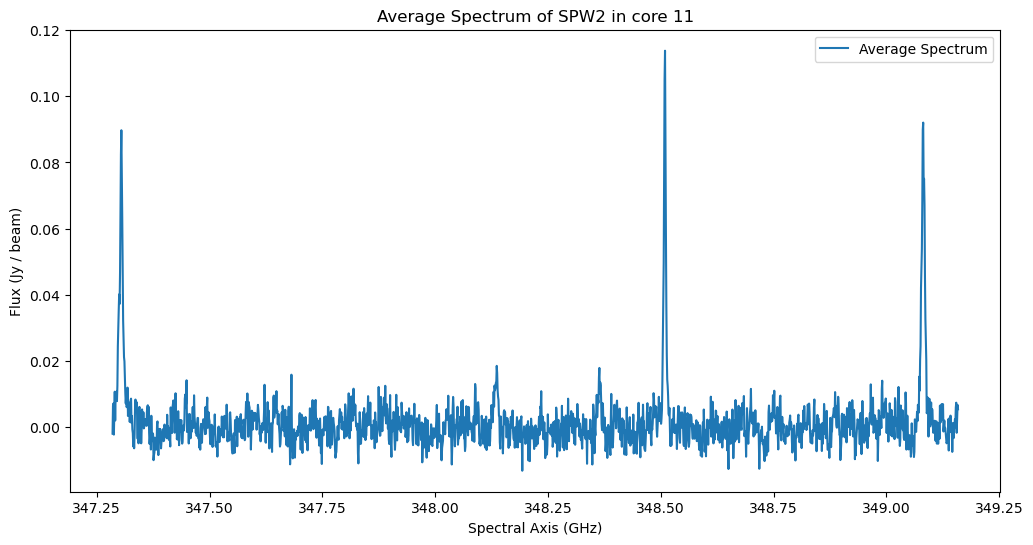

In [1]:
# In the following code I will fit the masked region into SPW 2 for both, core 9 and 11 (switch 9 and 11 in filenames to choose which one to change and write as FITS file)
from astropy.io import fits
import numpy as np
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
# %matplotlib qt
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp
import regions

fits_file_1 = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW2.clean.image.pbcor.fits"
cube = SpectralCube.read(fits_file_1)
cube.allow_huge_operations=True
region_list = regions.Regions.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\Core_11_MASK.reg")  
sub_cube = cube.subcube_from_regions(region_list)  
# sub_cube= sub_cube.to(u.K)
sub_cube.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW2\SPW2_CORE_11_mask.fits")
spec_axis = sub_cube.spectral_axis.to(u.GHz)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure(figsize=(12, 6))
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW2 in core 11')
plt.legend()

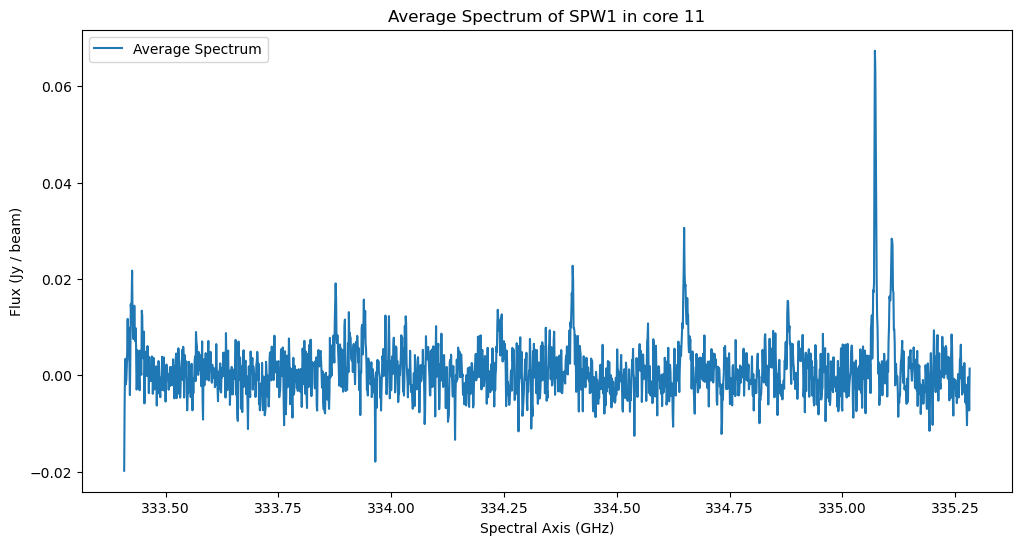

In [1]:
# In the following code I will fit the masked region into SPW 1 for both, core 9 and 11 (switch 9 and 11 in filenames to choose which one to change and write as FITS file)
from astropy.io import fits
import numpy as np
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
%matplotlib inline
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp
import regions

fits_file_1 = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW1.clean.image.pbcor.fits"
cube = SpectralCube.read(fits_file_1)
cube.allow_huge_operations=True
region_list = regions.Regions.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\Core_11_MASK.reg")  
sub_cube = cube.subcube_from_regions(region_list)  
# sub_cube= sub_cube.to(u.K)
sub_cube.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW1\SPW1_CORE_11_mask.fits")
spec_axis = sub_cube.spectral_axis.to(u.GHz)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure(figsize=(12, 6))
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW1 in core 11')
plt.legend()

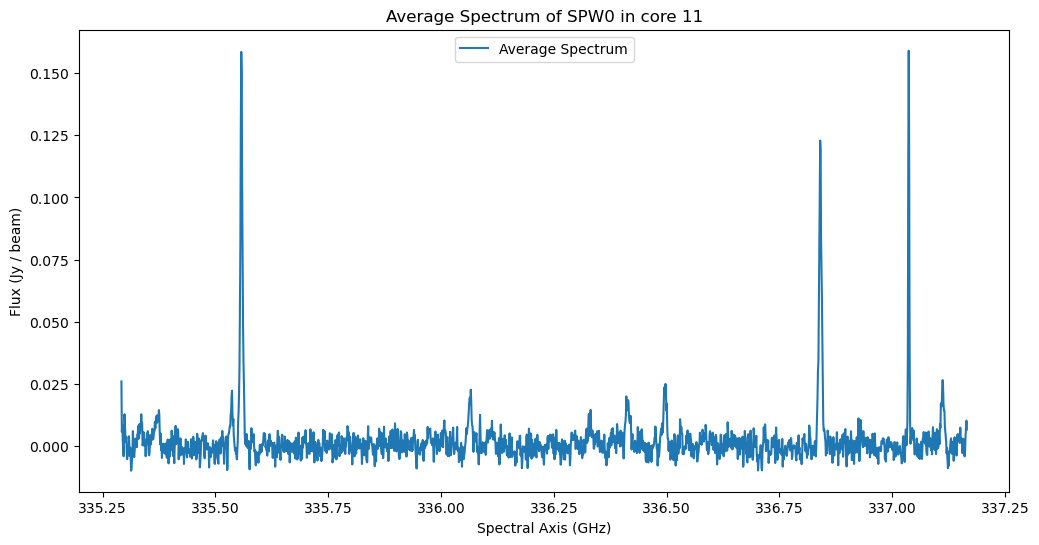

In [1]:
# In the following code I will fit the masked region into SPW 0 for both, core 9 and 11 (switch 9 and 11 in filenames to choose which one to change and write as FITS file)
from astropy.io import fits
import numpy as np
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file
%matplotlib inline
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp
import regions

fits_file_1 = r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\G53.11_MM1.ms.cube.SPW0.clean.image.pbcor.fits"
cube = SpectralCube.read(fits_file_1)
cube.allow_huge_operations=True
region_list = regions.Regions.read(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\Core_11_MASK.reg")  
sub_cube = cube.subcube_from_regions(region_list)  
# sub_cube= sub_cube.to(u.K)
sub_cube.write(r"C:\Users\Ayush Shivkumar\OneDrive\Desktop\PRL\FITS files\ALMA\SPW0\SPW0_CORE_11_mask.fits")
spec_axis = sub_cube.spectral_axis.to(u.GHz)
average_spectrum = sub_cube.mean(axis=(1, 2))
plt.figure(figsize=(12, 6))
plt.plot(spec_axis, average_spectrum, label='Average Spectrum')
plt.xlabel('Spectral Axis ({})'.format(spec_axis.unit))
plt.ylabel('Flux ({})'.format(average_spectrum.unit))
plt.title('Average Spectrum of SPW0 in core 11')
plt.legend()